---

_You are currently looking at **version 0.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the Jupyter Notebook FAQ course resource._

---

# Assignment 1 - Introduction to Machine Learning

For this assignment, you will be using the Breast Cancer Wisconsin (Diagnostic) Database to create a classifier that can help diagnose patients. First, read through the description of the dataset (below).

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

print(cancer.DESCR) # Print the data set description

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

The object returned by `load_breast_cancer()` is a scikit-learn Bunch object, which is similar to a dictionary.

In [2]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

### Question 0 (Example)

How many features does the breast cancer dataset have?

*This function should return an integer.*

In [9]:
# You should write your whole answer within the function provided. The autograder will call
# this function and compare the return value against the correct solution value
def answer_zero():
    # This function returns the number of features of the breast cancer dataset, which is an integer. 
    # The assignment question description will tell you the general format the autograder is expecting
    
    # cancer.data.shape[1] gives number of columns/features
    return cancer.data.shape[1]

# Call the function
answer_zero()

# You can examine what your function returns by calling it in the cell. If you have questions
# about the assignment formats, check out the discussion forums for any FAQs

30

### Question 1

Scikit-learn works with lists, numpy arrays, scipy-sparse matrices, and pandas DataFrames, so converting the dataset to a DataFrame is not necessary for training this model. Using a DataFrame does however help make many things easier such as munging data, so let's practice creating a classifier with a pandas DataFrame. 



Convert the sklearn.dataset `cancer` to a DataFrame. 

*This function should return a `(569, 31)` DataFrame with * 

*columns = *

    ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
    'mean smoothness', 'mean compactness', 'mean concavity',
    'mean concave points', 'mean symmetry', 'mean fractal dimension',
    'radius error', 'texture error', 'perimeter error', 'area error',
    'smoothness error', 'compactness error', 'concavity error',
    'concave points error', 'symmetry error', 'fractal dimension error',
    'worst radius', 'worst texture', 'worst perimeter', 'worst area',
    'worst smoothness', 'worst compactness', 'worst concavity',
    'worst concave points', 'worst symmetry', 'worst fractal dimension',
    'target']

*and index = *

    RangeIndex(start=0, stop=569, step=1)

In [12]:
def answer_one():
    import pandas as pd
    # Step 1: Create a DataFrame from the feature data
    df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
    
    # Step 2: Add the target column
    df['target'] = cancer.target
    
    return df

answer_one().shape

(569, 31)

### Question 2
What is the class distribution? (i.e. how many instances of `malignant` and how many `benign`?)

*This function should return a Series named `target` of length 2 with integer values and index =* `['malignant', 'benign']`

In [14]:
def answer_two():
    target = pd.Series(cancer.target)  # Convert target array to a pandas Series
    counts = target.value_counts()     # Count how many 0s and 1s
    result = pd.Series([counts[0], counts[1]], index=['malignant', 'benign'])  # Label them
    result.name = "target"             
    return result
answer_two()

malignant    212
benign       357
Name: target, dtype: int64

### Question 3
Split the DataFrame into `X` (the data) and `y` (the labels).

*This function should return a tuple of length 2:* `(X, y)`*, where* 
* `X` *has shape* `(569, 30)`
* `y` *has shape* `(569,)`.

In [22]:
def answer_three():
    cancerdf = answer_one()                 # Get the full DataFrame
    X = cancerdf.drop('target', axis=1)     # Drop 'target' → get only features
    y = cancerdf['target']                  # Get only the label
    return X, y                             # Return as a tuple (X, y)
answer_three()[0].shape
answer_three()[1].shape

(569, 30)

### Question 4
Using `train_test_split`, split `X` and `y` into training and test sets `(X_train, X_test, y_train, and y_test)`.

**Set the random number generator state to 0 using `random_state=0` to make sure your results match the autograder!**

*This function should return a tuple of length 4:* `(X_train, X_test, y_train, y_test)`*, where* 
* `X_train` *has shape* `(426, 30)`
* `X_test` *has shape* `(143, 30)`
* `y_train` *has shape* `(426,)`
* `y_test` *has shape* `(143,)`

In [27]:
from sklearn.model_selection import train_test_split

def answer_four():
    X, y = answer_three()  # Get features and labels
    # Split into train (75%) and test (25%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
    return X_train, X_test, y_train, y_test
[X.shape for X in answer_four()]

[(426, 30), (143, 30), (426,), (143,)]

### Question 5
Using KNeighborsClassifier, fit a k-nearest neighbors (knn) classifier with `X_train`, `y_train` and using one nearest neighbor (`n_neighbors = 1`).

*This function should return a `sklearn.neighbors.classification.KNeighborsClassifier`.

In [28]:
from sklearn.neighbors import KNeighborsClassifier

def answer_five():
    # Get the training and test sets
    X_train, X_test, y_train, y_test = answer_four()

    # Create the k-NN classifier with k=1
    knn = KNeighborsClassifier(n_neighbors=1)

    # Fit the model on the training data
    knn.fit(X_train, y_train)

    # Return the trained model
    return knn

In [30]:
answer_five()

KNeighborsClassifier(n_neighbors=1)

### Question 6
Using your knn classifier, predict the class label using the mean value for each feature.

Hint: You can use `cancerdf.mean()[:-1].values.reshape(1, -1)` which gets the mean value for each feature, ignores the target column, and reshapes the data from 1 dimension to 2 (necessary for the precict method of KNeighborsClassifier).

In [32]:
def answer_six():
    cancerdf = answer_one()                      # Get the full DataFrame
    knn = answer_five()                          # Get the trained k-NN model
    
    # Get the average of each feature (excluding the target column)
    mean_features = cancerdf.drop('target', axis=1).mean().values.reshape(1, -1)
    
    # Predict the class for this average feature set
    return knn.predict(mean_features)
answer_six()

array([1])

### Question 7
Using your knn classifier, predict the class labels for the test set `X_test`.

*This function should return a numpy array with shape `(143,)` and values either `0.0` or `1.0`.*

In [33]:
def answer_seven():
    X_train, X_test, y_train, y_test = answer_four()  # Get the data splits
    knn = answer_five()                               # Get the trained model
    return knn.predict(X_test)                        # Predict labels for X_test
answer_seven()

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

### Question 8
Find the score (mean accuracy) of your knn classifier using `X_test` and `y_test`.

*This function should return a float between 0 and 1*

In [35]:
def answer_eight():
    X_train, X_test, y_train, y_test = answer_four()  # Get training and test sets
    knn = answer_five()                               # Get the trained model
    return knn.score(X_test, y_test)                  # Return accuracy on test set
answer_eight()

0.916083916083916

### Optional plot

Try using the plotting function below to visualize the different predicition scores between train and test sets, as well as malignant and benign cells.

In [37]:
def accuracy_plot():
    import matplotlib.pyplot as plt
    from sklearn.model_selection import train_test_split
    from sklearn.neighbors import KNeighborsClassifier

    # Get data
    X, y = answer_three()
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

    # Store accuracies
    training_accuracy = []
    test_accuracy = []

    # Try k values from 1 to 10
    neighbors_settings = range(1, 11)

    for n_neighbors in neighbors_settings:
        # Build the model
        knn = KNeighborsClassifier(n_neighbors=n_neighbors)
        knn.fit(X_train, y_train)

        # Record training and test set accuracy
        training_accuracy.append(knn.score(X_train, y_train))
        test_accuracy.append(knn.score(X_test, y_test))

    # Plot the results
    plt.figure()
    plt.plot(neighbors_settings, training_accuracy, label="Training accuracy")
    plt.plot(neighbors_settings, test_accuracy, label="Test accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("n_neighbors")
    plt.legend()
    plt.title("k-NN Accuracy for Different k Values")
    plt.grid(True)
    plt.show()

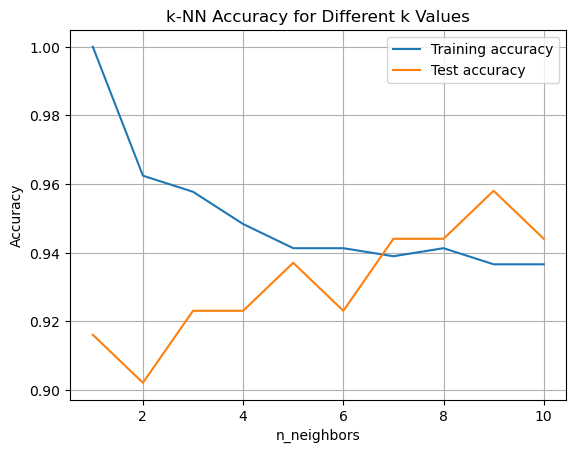

In [38]:
# Uncomment the plotting function to see the visualization, 
# Comment out the plotting function when submitting your notebook for grading

accuracy_plot() 